In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [32]:
# unzip the data
path='/content/homer_bart_2.zip'

zip_obect=zipfile.ZipFile(file=path,mode='r')
zip_obect.extractall('./')
zip_obect.close


<bound method ZipFile.close of <zipfile.ZipFile filename='/content/homer_bart_2.zip' mode='r'>>

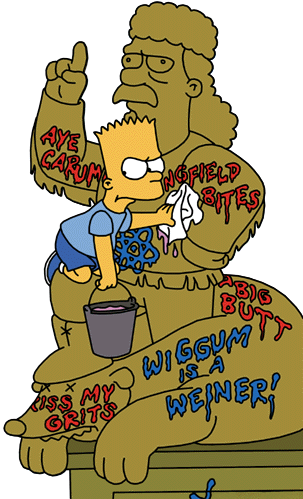

In [33]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart101.bmp')

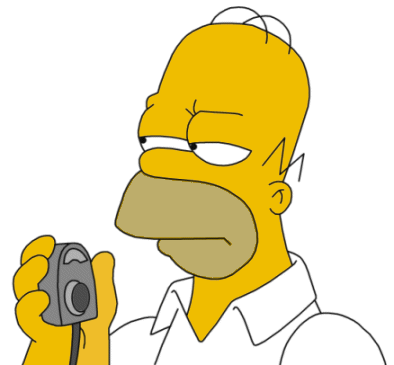

In [34]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer104.bmp')

In [35]:
#Preprocessing on train and test dataset

In [36]:

training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

train_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [37]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [39]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


In [40]:
# Model Building

In [41]:
network = Sequential()

network.add(Conv2D(64, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Flatten())

# network.add(Dense(units = 3137, activation='relu'))
# network.add(Dense(units = 3137, activation='relu'))
# network.add(Dense(units = 2, activation='softmax'))

In [42]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

In [43]:

network.add(Dense(units = 1152, activation='relu'))
network.add(Dense(units = 512, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

In [44]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

In [45]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [46]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [47]:
history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/50


<ipython-input-47-15d1aa137e0a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset, callbacks=[early_stopping])


27/27 [==============================] - 3s 34ms/step - loss: 0.6290 - accuracy: 0.6512 - val_loss: 0.8252 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 1s 31ms/step - loss: 0.5669 - accuracy: 0.7256 - val_loss: 0.5891 - val_accuracy: 0.7037
Epoch 3/50
27/27 [==============================] - 1s 42ms/step - loss: 0.4729 - accuracy: 0.7767 - val_loss: 0.4472 - val_accuracy: 0.7963
Epoch 4/50
27/27 [==============================] - 1s 44ms/step - loss: 0.4449 - accuracy: 0.8000 - val_loss: 0.3380 - val_accuracy: 0.8889
Epoch 5/50
27/27 [==============================] - 1s 30ms/step - loss: 0.3879 - accuracy: 0.7907 - val_loss: 0.5139 - val_accuracy: 0.7593
Epoch 6/50
27/27 [==============================] - 1s 25ms/step - loss: 0.3203 - accuracy: 0.8744 - val_loss: 1.1142 - val_accuracy: 0.6296
Epoch 7/50
27/27 [==============================] - 1s 43ms/step - loss: 0.4391 - accuracy: 0.8326 - val_loss: 0.4125 - val_accuracy: 0.8333
Epoch 8/50
27/27 [======

## Evaluating the neural network

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

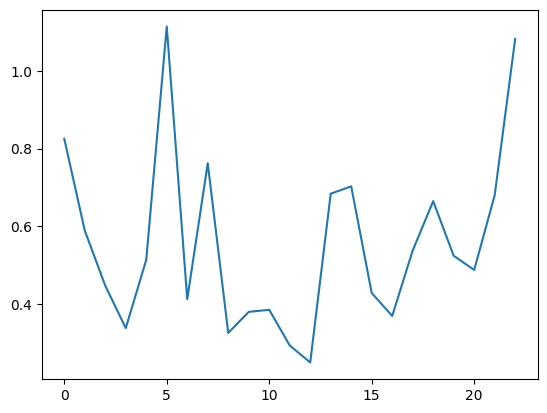

In [49]:
plt.plot(history.history['val_loss']);

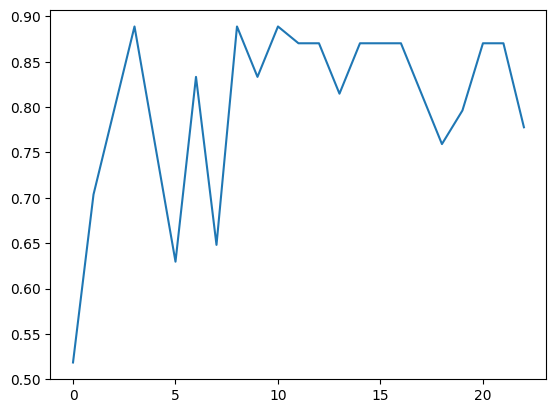

In [50]:
plt.plot(history.history['val_accuracy']);

In [51]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [52]:
#it will give prob of prediction of each class
predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 0s 3ms/step


array([[1.00000000e+00, 3.99791311e-08],
       [9.99999642e-01, 3.46730502e-07],
       [3.79962474e-01, 6.20037556e-01],
       [9.99998927e-01, 1.06501307e-06],
       [9.99998450e-01, 1.58715147e-06],
       [9.99992490e-01, 7.49062110e-06],
       [9.79834855e-01, 2.01651603e-02],
       [1.53556243e-01, 8.46443772e-01],
       [9.66995180e-01, 3.30047347e-02],
       [7.91136920e-01, 2.08863109e-01],
       [8.31211388e-01, 1.68788567e-01],
       [9.99884009e-01, 1.15970863e-04],
       [9.91695821e-01, 8.30422621e-03],
       [9.92637515e-01, 7.36247934e-03],
       [9.98712063e-01, 1.28788734e-03],
       [9.99942183e-01, 5.78112486e-05],
       [7.03030229e-01, 2.96969801e-01],
       [9.99955058e-01, 4.49425643e-05],
       [9.83094096e-01, 1.69059802e-02],
       [1.00000000e+00, 4.51693927e-09],
       [9.79790747e-01, 2.02091914e-02],
       [1.00000000e+00, 5.29703836e-09],
       [9.98913050e-01, 1.08699186e-03],
       [5.71131945e-01, 4.28867996e-01],
       [9.905648

In [53]:
# convert prob into labels
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [71]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8703703703703703

In [56]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

<Axes: >

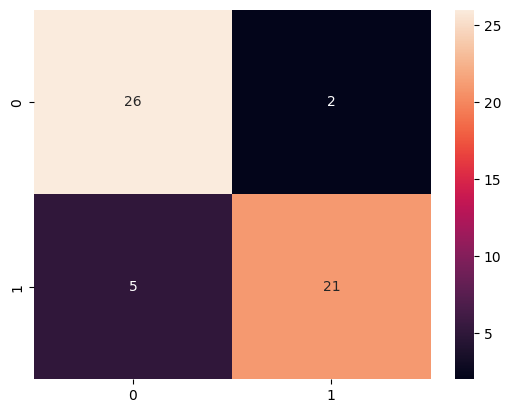

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [58]:
# The neural network can correctly identify 75% of the bart images and when it
# identifies these bart images, it is correct 68% of the time
# We can conclude that this neural network is better for classifying bart images, as
# we saw in the confusion matrix
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.91      0.81      0.86        26

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



## Saving and loading the model

In [59]:

# Save the model to a file
network.save('my_cnn_model.h5')

# Later, when you want to use the model for inference
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('my_cnn_model.h5')
loaded_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

## Classifying one single image

In [72]:
image = cv2.imread('/content/homer_bart_2/test_set/bart/bart26.bmp')

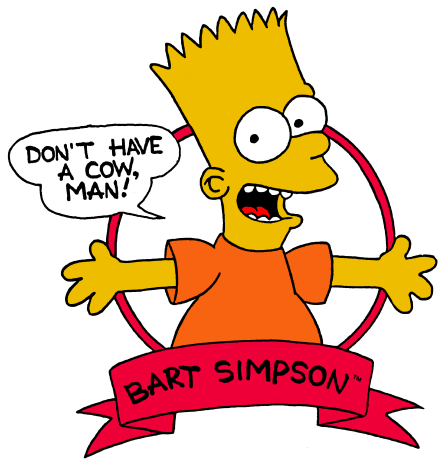

In [73]:
cv2_imshow(image)

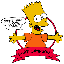

In [74]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
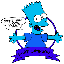

In [75]:
image

In [64]:
image = image / 255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [65]:
image.shape

(64, 64, 3)

In [66]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [67]:
result = loaded_model(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.98399943, 0.01600052]], dtype=float32)>

In [68]:
result = np.argmax(result)
result

0

In [69]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [70]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Bart
